In [1]:
import scanpy as sc
from sklearn import metrics
import pandas as pd

In [2]:
mesoderm_data = sc.read_h5ad('/mnt/d/dailywork/coembed_germ_layer_medoderm.h5ad')

In [4]:
mesoderm_data

AnnData object with n_obs × n_vars = 123288 × 16725
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'infer_age', 'infer_age_int', 'sub_cluster_number', 'subtype', 'subtype_exclude', 'tissue', 'germ_layer', 'RNA_snn_res.1.7', 'assay', 'timeslot', 'subtype_new'
    var: 'name'
    uns: 'neighbors', 'subtype_new_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


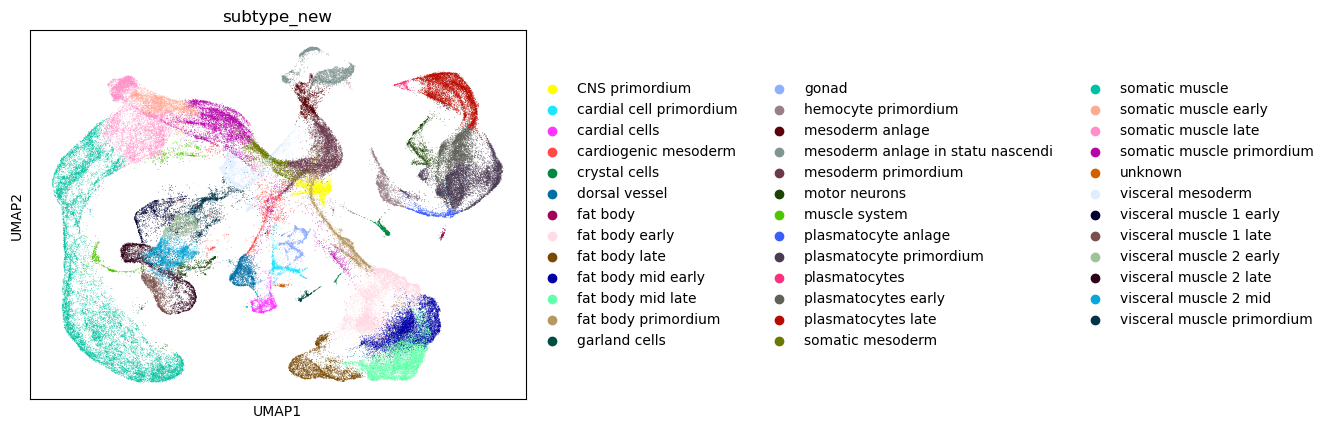

In [3]:
sc.pp.neighbors(mesoderm_data)
sc.pl.umap(mesoderm_data, color='subtype_new')

In [32]:
mesoderm_trajectory = pd.DataFrame([['mesoderm anlage in statu nascendi', 'mesoderm anlage'],
                                    ['mesoderm anlage', 'mesoderm primordium'],
                                    ['mesoderm primordium', 'somatic mesoderm'],
                                    ['somatic mesoderm', 'somatic muscle primordium'],
                                    ['somatic muscle primordium', 'somatic muscle early'],
                                    ['somatic muscle early', 'somatic muscle late'],
                                    ['mesoderm primordium', 'visceral mesoderm'],
                                    ['visceral mesoderm', 'visceral muscle primordium'],
                                    ['visceral muscle primordium', 'visceral muscle 1 early'],
                                    ['visceral muscle 1 early', 'visceral muscle 1 late'],
                                    ['visceral muscle primordium', 'visceral muscle 2 early'],
                                    ['visceral muscle 2 early', 'visceral muscle 2 mid'],
                                    ['visceral muscle 2 mid', 'visceral muscle 2 late'],
                                    ['mesoderm primordium', 'cardiogenic mesoderm'],
                                    ['cardiogenic mesoderm', 'dorsal vessel'],
                                    ['cardiogenic mesoderm', 'cardial cell primordium'],
                                    ['cardial cell primordium', 'cardial cells'],
                                    ['mesoderm primordium', 'fat body primordium'],
                                    ['fat body primordium', 'fat body early'],
                                    ['fat body early', 'fat body mid early'],
                                    ['fat body mid early', 'fat body mid late'],
                                    ['fat body mid late', 'fat body late'],
                                    ['mesoderm primordium', 'hemocyte primordium'],
                                    ['hemocyte primordium', 'plasmatocyte anlage'],
                                    ['plasmatocyte anlage', 'plasmatocyte primordium'],
                                    ['plasmatocyte primordium', 'plasmatocytes early'],
                                    ['plasmatocytes early', 'plasmatocytes late'],
                                    ['hemocyte primordium', 'crystal cells']], columns=['Source', 'Target'])

In [50]:
import numpy as np

data_try = mesoderm_data.obs.copy().reset_index()

mesoderm_score = pd.DataFrame(columns=['Source', 'Target', 'Weight'])

for i in range(len(mesoderm_trajectory)):
    labels = data_try[np.in1d(data_try['subtype_new'], [mesoderm_trajectory.loc[i][0], mesoderm_trajectory.loc[i][1]])]['subtype_new']
    paired_data = mesoderm_data.obsm['X_umap'][[data_try[np.in1d(data_try['subtype_new'], [mesoderm_trajectory.loc[i][0], mesoderm_trajectory.loc[i][1]])].index.tolist()]]
    score = metrics.silhouette_score(paired_data, labels)
    mesoderm_score.loc[i] = [mesoderm_trajectory.loc[i][0], mesoderm_trajectory.loc[i][1], score]

/tmp/ipykernel_3002/3003844520.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  paired_data = mesoderm_data.obsm['X_umap'][[data_try[np.in1d(data_try['subtype_new'], [mesoderm_trajectory.loc[i][0], mesoderm_trajectory.loc[i][1]])].index.tolist()]]
/tmp/ipykernel_3002/3003844520.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  paired_data = mesoderm_data.obsm['X_umap'][[data_try[np.in1d(data_try['subtype_new'], [mesoderm_trajectory.loc[i][0], mesoderm_trajectory.loc[i][1]])].index.tolist()]]
/tmp/ipykernel_3002/3003844520.py:9: Futur

In [52]:
mesoderm_score.to_csv('/mnt/c/Users/ouyangkang/Desktop/mesoderm_distance.csv', index=None)